In [95]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import seaborn as sn

## loading and preprocessing of data 

In [96]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [97]:
len(X_train)

60000

In [98]:
len(X_test)

10000

In [99]:
X_train[(x:=random.randint(0, len(X_train) - 1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [100]:
X_train = X_train / 255 # scaling dataset form (0, 255) -> (0, 1)
X_test = X_test / 255

In [101]:
X_train[x]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

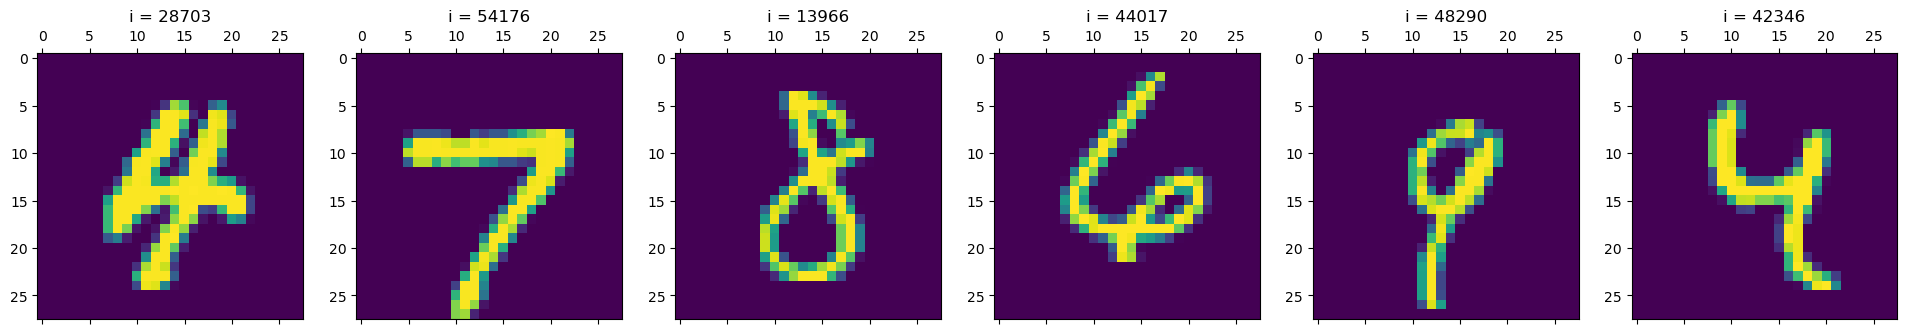

In [102]:
fig = plt.figure(figsize=(24, 4)) 
gs = fig.add_gridspec(1, 6)  
for a in range(6):
    ax = fig.add_subplot(gs[0,a])
    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.matshow(X_train[i])

In [103]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [104]:
X_train.shape

(60000, 28, 28)

In [105]:
X_train_flattend = X_train.reshape(len(X_train), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_train_flattend.shape

(60000, 784)

In [106]:
X_test_flattend = X_test.reshape(len(X_test), 784) # 28 * 28 = 784 converting from 2d array to 1d array
X_test_flattend.shape

(10000, 784)

In [107]:
print("Train Data No. =", j := random.randint(0, len(X_train)-1))
X_train_flattend[j]

Train Data No. = 5170


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

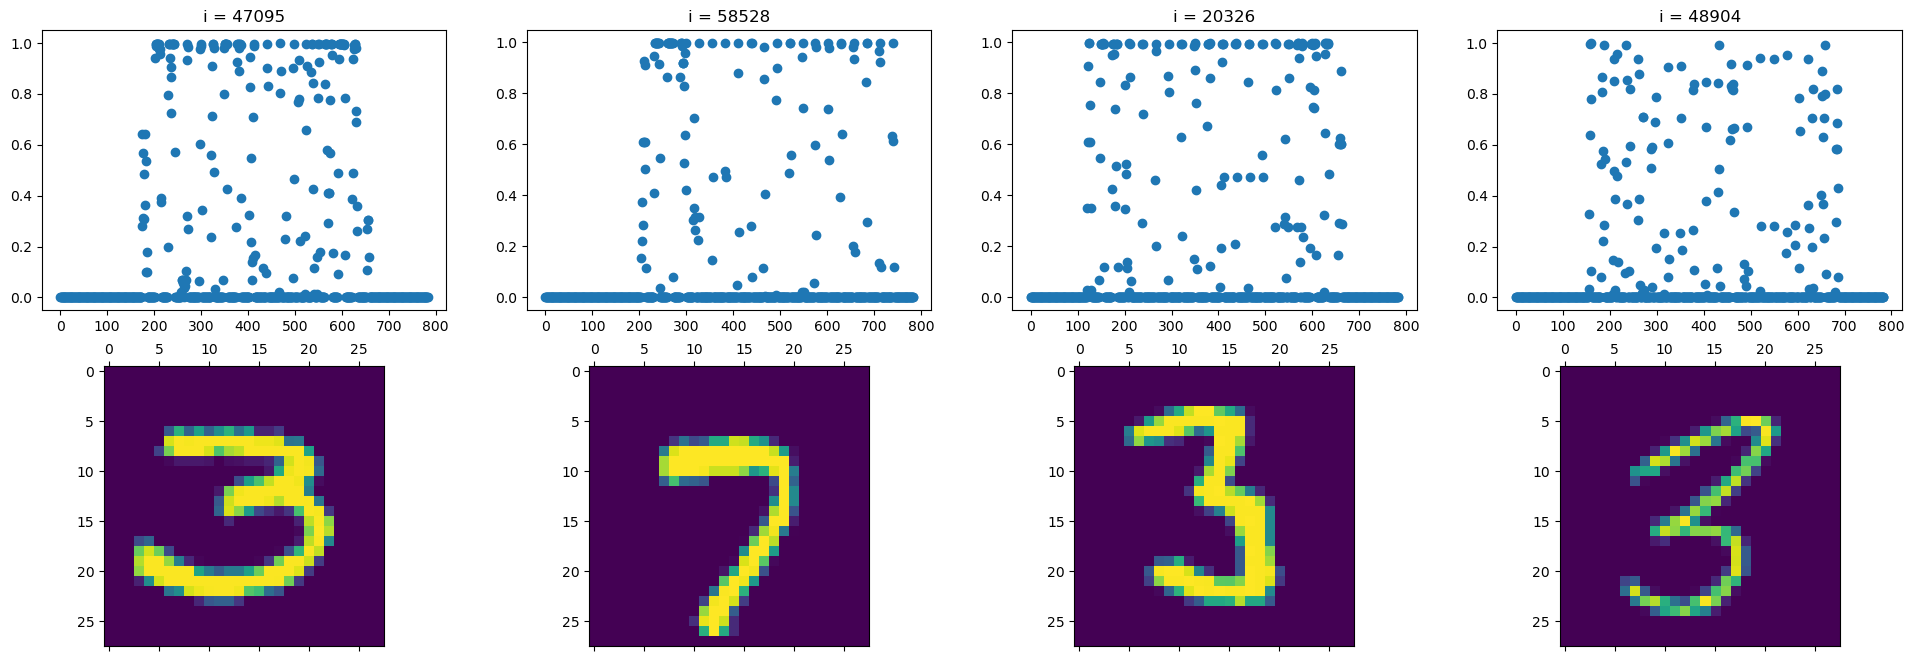

In [108]:
fig = plt.figure(figsize=(24, 8)) 
gs = fig.add_gridspec(2, 4)  

bins = range(X_train_flattend.shape[1])

for a in range(4):
    ax = fig.add_subplot(gs[0, a])    
    ay = fig.add_subplot(gs[1, a])    

    ax.set_title('i = ' + str(i := random.randint(0, len(X_train) - 1)))
    ax.scatter(bins, X_train_flattend[i])
    ay.matshow(X_train[i])

## Model_1 architechture and training

<img src="digits_nn.jpg" />

In [109]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
])

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_1.fit(X_train_flattend, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4680 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2664 - accuracy: 0.9260


In [110]:
model_1.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2734 - accuracy: 0.9242


[0.27343663573265076, 0.9241999983787537]

In [111]:
y_predicted = model_1.predict(X_test_flattend)
y_predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [112]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Output (7320) = [1.2503870e-02 3.6645242e-11 2.9846904e-06 6.8745524e-02 7.2465599e-02
 3.3244565e-01 2.1108573e-07 9.9958223e-01 2.9226810e-02 9.9186772e-01]
Predicted Number = 7 with prediction % = 99.95822310447693


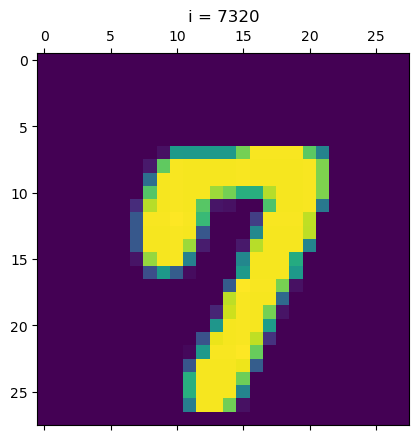

In [113]:
plt.matshow(X_test[(i := random.randint(0, len(X_test) - 1))])
plt.title('i = ' + str(i))
print('Output (' + str(i) + ') = ' + str(y_predicted[i]))
predictedNum, predictionPercentage = np.argmax(y_predicted[i]), max(y_predicted[i]) * 100
print(f'Predicted Number = {predictedNum} with prediction % = {predictionPercentage}')

In [114]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    4,    5,    4,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    9,  920,   20,    7,    3,   11,   12,   42,    2],
       [   2,    0,   16,  934,    0,   18,    2,   13,   21,    4],
       [   2,    1,    6,    2,  915,    0,    8,    6,   12,   30],
       [   9,    3,    3,   45,    8,  768,   10,    7,   34,    5],
       [  15,    3,    7,    1,    7,   12,  909,    2,    2,    0],
       [   1,    5,   22,    7,    3,    0,    0,  969,    3,   18],
       [   5,    7,    6,   28,    9,   21,    8,   13,  874,    3],
       [  10,    7,    1,   13,   32,    8,    0,   46,   10,  882]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

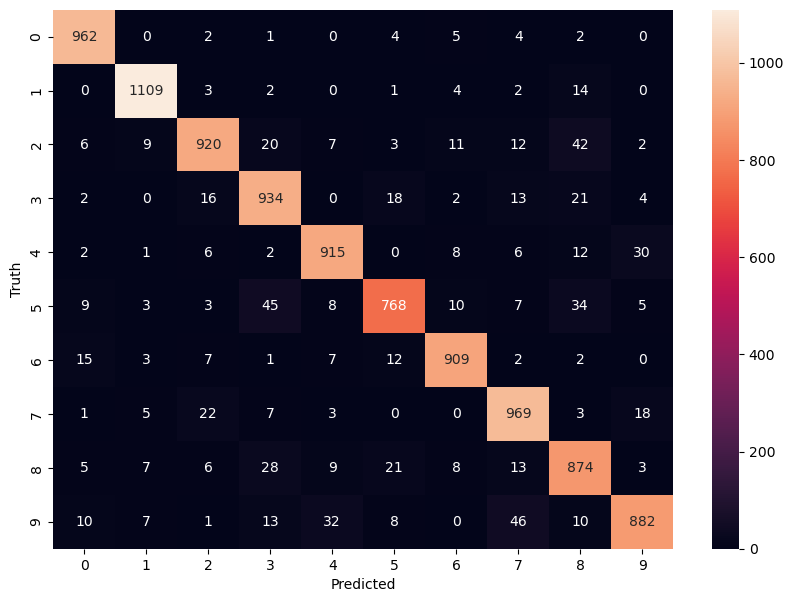

In [115]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [126]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # this layers take the 2d array input and converts it 1d array
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2680 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1191 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0823 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0619 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0499 - accuracy: 0.9848


In [128]:
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0840 - accuracy: 0.9747


[0.08397610485553741, 0.9746999740600586]

In [129]:
y_predicted = model_2.predict(X_test)
y_predicted.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [130]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Output (5039) = [1.0898910e-03 9.6858297e-05 7.9019256e-03 1.8392613e-03 9.9999917e-01
 2.8997008e-05 1.0583996e-03 1.7609274e-01 2.4187719e-04 9.5887923e-01]
Predicted Number = 4 with prediction % = 99.99991655349731


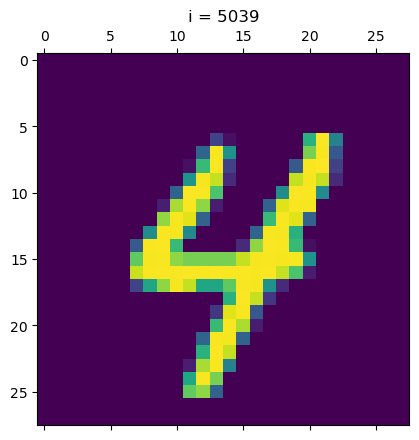

In [131]:
plt.matshow(X_test[(i := random.randint(0, len(X_test) - 1))])
plt.title('i = ' + str(i))
print('Output (' + str(i) + ') = ' + str(y_predicted[i]))
predictedNum, predictionPercentage = np.argmax(y_predicted[i]), max(y_predicted[i]) * 100
print(f'Predicted Number = {predictedNum} with prediction % = {predictionPercentage}')

In [132]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    1,    0,    3,    1,    1,    1,    1],
       [   0, 1117,    4,    3,    0,    1,    3,    1,    6,    0],
       [   5,    0, 1000,    6,    4,    0,    2,    7,    8,    0],
       [   0,    0,    4,  989,    0,    2,    0,    4,    1,   10],
       [   0,    0,    5,    0,  957,    1,    6,    1,    1,   11],
       [   2,    1,    0,   11,    1,  867,    2,    0,    5,    3],
       [   4,    2,    0,    1,    1,    4,  943,    0,    3,    0],
       [   1,    3,    9,    7,    4,    0,    0,  993,    0,   11],
       [   2,    0,    1,   12,    7,    5,    3,    4,  929,   11],
       [   2,    2,    0,    4,    9,    4,    0,    6,    0,  982]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

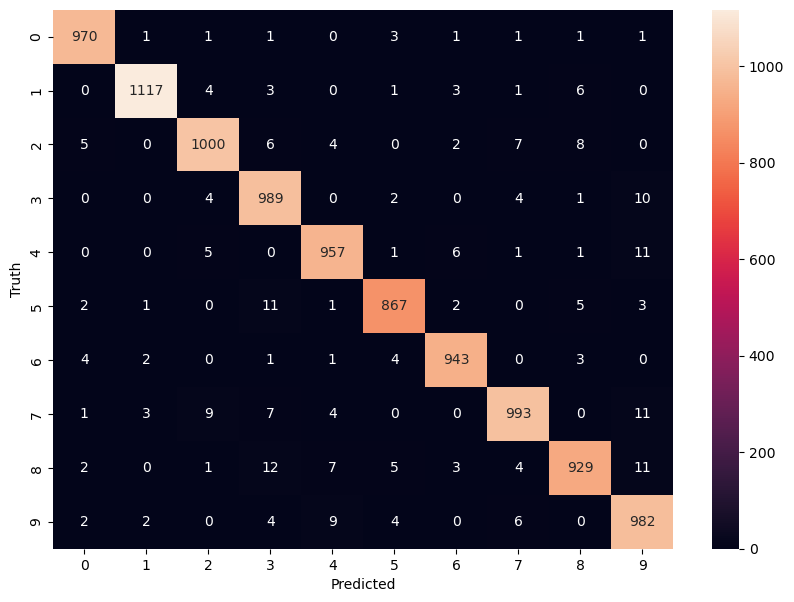

: 

In [133]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')